# Predicción del rating de Las aplicaciones en Google Play Store

[Edimer David Jaramillo (Sidereus)](https://edimer.github.io/)

![](competencia.PNG)

# Variables

![](variables.PNG)

# Datos Train

In [1]:
import pandas as pd

In [2]:
data_train = pd.read_csv("../data/train1.csv")
print(data_train.head)

<bound method NDFrame.head of                                               App            Category  Rating  \
0                            GPS Status & Toolbox    Travel_and_local       1   
1                                    Fish|Hunt FL           Lifestyle       0   
2                       Allrecipes Dinner Spinner      Food_and_drink       1   
3                            Don't touch my phone               Tools       0   
4                                 BM SPM Practice              Family       1   
...                                           ...                 ...     ...   
5783                           WhatsApp Messenger       Communication       1   
5784                                      DT NO.I  Health_and_fitness       0   
5785           MyRadar NOAA Weather Radar Ad Free             Weather       1   
5786  Account Class-12 Solutions (D K Goel) Vol-1              Family       1   
5787                 Join R, Community Engagement              Social       1  

# Datos Test

In [3]:
data_test = pd.read_csv("../data/test1.csv")
print(data_test.head)

<bound method NDFrame.head of                                                     App          Category  \
0                                          Bk Usha behn         Lifestyle   
1                                       Funny Ringtones   Personalization   
2                                             Strava.cz          Shopping   
3                                    BL Flowers Digital          Shopping   
4     eCooltra: scooter sharing. Share electric scoo...  Travel_and_local   
...                                                 ...               ...   
1443                                           Fossil Q         Lifestyle   
1444                       Co-op Credit Union on the Go           Finance   
1445                               EXOGEN Connects (US)           Medical   
1446                                             myGrow      Productivity   
1447                                          EZ PZ RPG            Family   

      Reviews  Type content_rating       new_

# Datos Submission

In [7]:
data_sub = pd.read_csv("../data/sample_submission.csv")

# Variables para análisis

In [9]:
# Selección de columnnas
mi_train = data_train.drop(["App", "date_update"], axis = 1)
mi_test = data_test.drop(["App", "date_update"], axis = 1)

# Partición de datos

In [10]:
data = mi_train.sample(frac = 0.95, random_state = 786)
data_validation = mi_train.drop(data.index)
data.reset_index(inplace = True, drop = True)
data_validation.reset_index(inplace = True, drop = True)
print('Datos para modelación (train): ' + str(data.shape))
print('Datos para predicción (validation): ' + str(data_validation.shape))

Datos para modelación (train): (5499, 15)
Datos para predicción (validation): (289, 15)


# `setup` Pycaret

In [11]:
from pycaret.classification import *
mi_config = setup(data = data, target = "Rating", session_id = 1992)

,Description,Value
0,session_id,1992
1,Target,Rating
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5499, 15)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# Modelo LightGBM

In [14]:
modelo_lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7740,0.7515,0.9244,0.8054,0.8608,0.2756,0.2951
1,0.7455,0.7442,0.8969,0.7933,0.8419,0.2010,0.2114
2,0.7351,0.7145,0.8866,0.7890,0.8350,0.1753,0.1832
3,0.7766,0.7916,0.9175,0.8116,0.8613,0.2988,0.3143
4,0.7403,0.7182,0.9038,0.7851,0.8403,0.1638,0.1761
5,0.7740,0.7030,0.9414,0.7959,0.8626,0.2518,0.2829
6,0.7558,0.7465,0.9138,0.7934,0.8494,0.2221,0.2384
7,0.7610,0.7448,0.9138,0.7982,0.8521,0.2449,0.2609
8,0.7636,0.7671,0.9448,0.7851,0.8576,0.1964,0.2300
9,0.7500,0.7327,0.9138,0.7887,0.8466,0.1899,0.2060


# Tuning LightGBM

In [15]:
tuned_lgbm = tune_model(modelo_lgbm, optimize="F1", n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7558,0.7421,1.0000,0.7558,0.8609,0.0000,0.0000
1,0.7558,0.7335,1.0000,0.7558,0.8609,0.0000,0.0000
2,0.7558,0.6501,1.0000,0.7558,0.8609,0.0000,0.0000
3,0.7558,0.7824,1.0000,0.7558,0.8609,0.0000,0.0000
4,0.7558,0.7234,1.0000,0.7558,0.8609,0.0000,0.0000
5,0.7532,0.7127,1.0000,0.7532,0.8593,0.0000,0.0000
6,0.7532,0.7185,1.0000,0.7532,0.8593,0.0000,0.0000
7,0.7532,0.7407,1.0000,0.7532,0.8593,0.0000,0.0000
8,0.7532,0.7817,1.0000,0.7532,0.8593,0.0000,0.0000
9,0.7552,0.7293,1.0000,0.7552,0.8605,0.0000,0.0000


# Rendimiento del modelo

## Curvas ROC

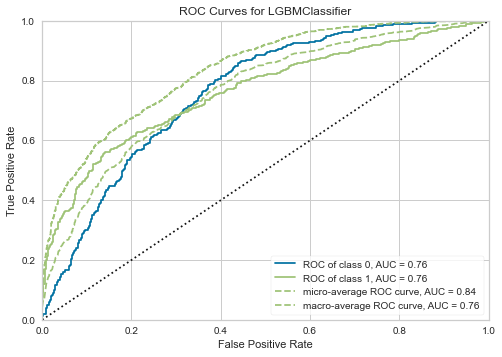

In [16]:
plot_model(tuned_lgbm, plot = 'auc')

# Matriz de confusión

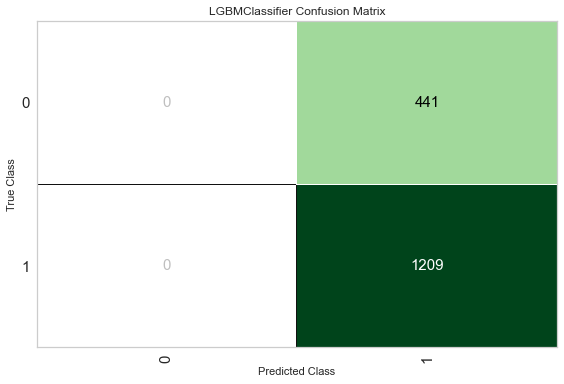

In [17]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

# Reporte de clasificación

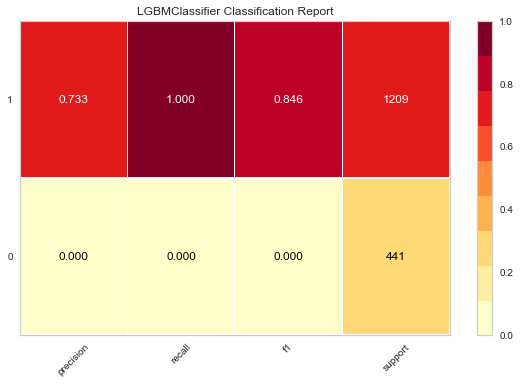

In [18]:
plot_model(tuned_lgbm, plot = "class_report")

# Importancia de variables

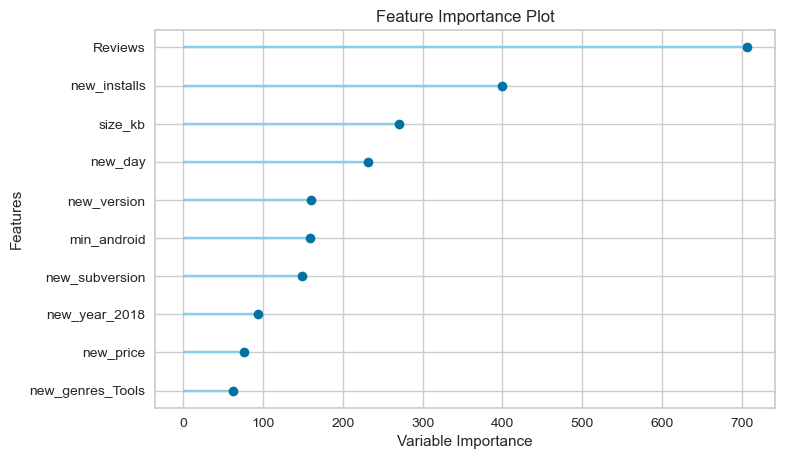

In [19]:
plot_model(tuned_lgbm, plot='feature')

# Predicción interna

In [20]:
predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7327,0.7636,1.0000,0.7327,0.8458,0.0000,0.0000


# Finalizando modelo

In [21]:
final_lgbm = finalize_model(tuned_lgbm)
final_lgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.008, max_depth=-1,
               min_child_samples=60, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=300, n_jobs=-1, num_leaves=10, objective=None,
               random_state=1992, reg_alpha=0.4, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# Predicción submission

In [22]:
predict_submission = predict_model(final_lgbm, data=mi_test)
predict_submission.head()

,Category,Reviews,Type,content_rating,new_genres,new_day,new_year,size_kb,new_installs,new_price,new_month_num,new_version,new_subversion,min_android,Label,Score
0,Lifestyle,10,Free,Everyone,Lifestyle,14,2018,3000.0,1000.0,0.0,1,1.0,0.0,4.1,1,0.6987
1,Personalization,7146,Free,Everyone 10+,Personalization,2,2018,14000.0,1000000.0,0.0,2,1.0,1.0,4.0,1,0.7642
2,Shopping,2221,Free,Everyone,Shopping,10,2018,NaN,100000.0,0.0,7,NaN,NaN,NaN,1,0.6616
3,Shopping,21,Free,Everyone,Shopping,31,2017,2500.0,100.0,0.0,10,1.0,6.0,4.2,1,0.8258
4,Travel_and_local,2822,Free,Everyone,Travel & Local,27,2018,27000.0,100000.0,0.0,7,1.0,21.0,4.1,1,0.7334


In [23]:
data_sub["rating"] = predict_submission["Label"]
data_sub.head(10)

,id,rating
0,5788,1
1,5789,1
2,5790,1
3,5791,1
4,5792,1
5,5793,1
6,5794,1
7,5795,1
8,5796,1
9,5797,1


# Exportando predicciones

In [24]:
data_sub.to_csv("../submission/sub_13_lightgbm.csv", index=False)